<a href="https://colab.research.google.com/github/Nusnan-AM/Final_waterQualty_Models/blob/main/Final_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-learn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
 16.pptx
'AidePersona (1).xlsx'
'AidePersona (2).xlsx'
 AidePersona.xlsx
'App2951 (1).pdf'
 App2951.pdf
 App2953.pdf
 App2954.pdf
'Appointment Letter - Internship Tharushi Vithanage.gdoc'
'Appointment Letter - Internship Tharushi Vithanage.pdf'
'BOCDownload_26_4_20239_9_28 (1).pdf'
 catboost_info
'ceylin (1).gsheet'
'ceylin (2).gsheet'
'ceylin (3).gsheet'
'ceylin (4).gsheet'
 ceylin.gsheet
 Ceylin.gsheet
 ceylin.xlsx
'check list for student -.docx'
'Colab Notebooks'
 colour_ngboost_model.pkl
 colour_ngboost.pkl
'Consulting proposal (1).gslides'
'Consulting proposal (2).gslides'
'Consulting proposal.gslides'
'Copy of Swag_bag.xlsx'
'Course work - React.gdoc'
'C Sharp Programming Advance.zip'
'Edited2 Final CST 27 PROPOSAL.docx'
 Final_colour.csv
 Final_ec.csv
 Final_ph.csv
 Final_tds.csv
 Final_turbidity.csv
'Getting started.pdf'
'Group 27Research.drawio.png'
'Group_27-Research Proposal new.gdoc'
'Hash Casino (1).xlsx'
'Hash Casino (2).xlsx'
'Hash Casino (3).x

In [ ]:
%cd /content/gdrive/MyDrive/

/content/gdrive/MyDrive


Load **Data**

In [ ]:
data_PH = pd.read_csv("Final_ph.csv")
data_EC = pd.read_csv("Final_ec.csv")
data_Turbidity = pd.read_csv("Final_turbidity.csv")
data_Colour = pd.read_csv("Final_colour.csv")
data_TDS = pd.read_csv("Final_tds.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_PH.head()

,Date,Raw_Colour,Raw_Turbidity,Raw_Ec,Raw_TDS,Raw_Ph,T1A,T1B,T2A,T2B,...,F2A,F2B,contact_tank,clear_well,PAC,KMnO4,ACD,CalPAC,CalKMnO4,CalACD
0,1/1/2019,500.0,74.7,118.4,64.60,7.32,7.08,7.03,7.06,7.09,...,6.98,6.93,6.83,6.78,2.5,0.52,0.65,20000,4160,5200
1,1/2/2019,484.0,46.7,123.8,67.87,8.51,8.84,8.25,8.37,8.54,...,7.72,7.74,7.71,7.74,0.5,0.20,0.20,4000,1600,1600
2,1/3/2019,326.0,42.1,169.5,78.30,7.43,7.67,7.55,7.43,7.42,...,7.65,7.60,7.54,7.61,4.0,0.65,0.30,32000,5200,2400
3,1/7/2019,454.0,43.4,124.5,68.10,7.16,7.04,7.11,7.05,7.10,...,6.91,6.88,6.89,6.72,1.0,0.18,0.20,8000,1440,1600
4,1/8/2019,307.0,38.3,118.4,86.32,7.09,6.91,6.88,6.86,6.84,...,6.86,6.85,6.84,6.96,3.0,0.15,0.30,24000,1200,2400


In [ ]:
data_EC.head()

,Date,Raw_Colour,Raw_Turbidity,Raw_Ec,Raw_TDS,Raw_Ph,T1A,T1B,T2A,T2B,...,F2A,F2B,contact_tank,clear_well,PAC,KMnO4,ACD,CalPAC,CalKMnO4,CalACD
0,12/3/2019,500.0,74.7,118.4,64.60,7.32,148.1,137.2,144.1,130.1,...,148.4,149.3,156.5,150.0,2.5,0.52,0.65,20000,4160,5200
1,12/4/2019,484.0,46.7,123.8,67.87,8.51,180.6,160.4,169.5,160.7,...,155.0,157.3,168.4,165.2,0.5,0.20,0.20,4000,1600,1600
2,11/28/2019,326.0,42.1,169.5,78.30,7.43,180.3,182.3,180.1,180.2,...,166.3,166.3,163.6,164.5,4.0,0.65,0.30,32000,5200,2400
3,11/29/2019,454.0,43.4,124.5,68.10,7.16,145.2,142.1,141.4,141.3,...,141.6,141.4,148.7,144.7,1.0,0.18,0.20,8000,1440,1600
4,11/26/2019,307.0,38.3,118.4,86.32,7.09,130.3,128.4,126.1,127.3,...,145.8,152.9,152.7,148.8,3.0,0.15,0.30,24000,1200,2400


In [ ]:
data_Turbidity.head()

,Date,Raw_Colour,Raw_Turbidity,Raw_Ec,Raw_TDS,Raw_Ph,T1A,T1B,T2A,T2B,...,F2A,F2B,contact_tank,clear_well,PAC,KMnO4,ACD,CalPAC,CalKMnO4,CalACD
0,12/3/2019,500.0,74.7,118.4,64.60,7.32,27.2,16.3,74.9,36.0,...,0.61,0.63,0.32,0.84,2.5,0.52,0.65,20000,4160,5200
1,12/4/2019,484.0,46.7,123.8,67.87,8.51,45.7,28.3,14.9,15.7,...,0.40,0.60,0.31,0.42,0.5,0.20,0.20,4000,1600,1600
2,11/28/2019,326.0,42.1,169.5,78.30,7.43,33,31.2,32.6,41.5,...,0.76,0.65,0.78,1.56,4.0,0.65,0.30,32000,5200,2400
3,11/29/2019,454.0,43.4,124.5,68.10,7.16,18.2,16.2,7.15,30.8,...,0.13,0.41,0.92,0.71,1.0,0.18,0.20,8000,1440,1600
4,11/26/2019,307.0,38.3,118.4,86.32,7.09,38,20.6,26.9,25.8,...,0.97,1.00,0.42,0.58,3.0,0.15,0.30,24000,1200,2400


In [ ]:
data_Colour.head()

,Date,Raw_Colour,Raw_Turbidity,Raw_Ec,Raw_TDS,Raw_Ph,T1A,T1B,T2A,T2B,...,F2A,F2B,contact_tank,clear_well,PAC,KMnO4,ACD,CalPAC,CalKMnO4,CalACD
0,12/3/2019,500.0,74.7,118.4,64.60,7.32,420.0,155.0,500.0,500.0,...,0.0,2.0,0,0,2.5,0.52,0.65,20000,4160,5200
1,12/4/2019,484.0,46.7,123.8,67.87,8.51,409.0,285.0,185.0,158.0,...,0.0,0.0,0,0,0.5,0.20,0.20,4000,1600,1600
2,11/28/2019,326.0,42.1,169.5,78.30,7.43,101.0,90.0,85.0,72.0,...,2.0,3.0,9,10,4.0,0.65,0.30,32000,5200,2400
3,11/29/2019,454.0,43.4,124.5,68.10,7.16,21.0,46.0,64.0,39.0,...,4.0,10.0,8,10,1.0,0.18,0.20,8000,1440,1600
4,11/26/2019,307.0,38.3,118.4,86.32,7.09,124.0,249.0,153.0,210.0,...,0.0,0.0,11,13,3.0,0.15,0.30,24000,1200,2400


In [ ]:
X_ph = data_PH[['CalPAC', 'CalKMnO4', 'Raw_Ph', 'CalACD','Raw_Colour','Raw_Turbidity','Raw_Ec','Raw_TDS']]
y_ph = data_PH['clear_well']
X_ec = data_EC[['CalPAC', 'CalKMnO4', 'Raw_Ph', 'CalACD','Raw_Colour','Raw_Turbidity','Raw_Ec','Raw_TDS']]
y_ec = data_EC['clear_well']
X_turbidity = data_Turbidity[['CalPAC', 'CalKMnO4', 'Raw_Ph', 'CalACD','Raw_Colour','Raw_Turbidity','Raw_Ec','Raw_TDS']]
y_turbidity = data_Turbidity['clear_well']
X_colour = data_Colour[['CalPAC', 'CalKMnO4', 'Raw_Ph', 'CalACD','Raw_Colour','Raw_Turbidity','Raw_Ec','Raw_TDS']]
y_colour = data_Colour['clear_well']
X_tds = data_TDS[['CalPAC', 'CalKMnO4', 'Raw_Ph', 'CalACD','Raw_Colour','Raw_Turbidity','Raw_Ec','Raw_TDS']]
y_tds = data_TDS['clear_well']

TDS

In [ ]:
X_tds_train, X_tds_test, y_tds_train, y_tds_test = train_test_split(X_tds, y_tds, test_size=0.2, random_state=42)

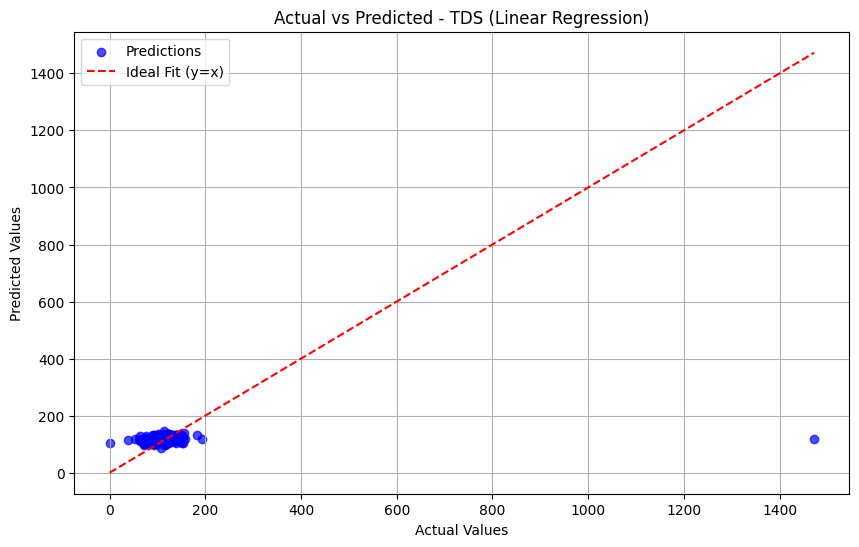

In [ ]:
model_tds = LinearRegression()
model_tds.fit(X_tds_train, y_tds_train)


y_tds_pred = model_tds.predict(X_tds_test)


results_TDS = pd.DataFrame({
    'Actual': y_tds_test,
    'Predicted': y_tds_pred
})


plt.figure(figsize=(10, 6))
plt.scatter(results_TDS['Actual'], results_TDS['Predicted'], color='blue', alpha=0.7, label='Predictions')
min_val = min(results_TDS['Actual'].min(), results_TDS['Predicted'].min())
max_val = max(results_TDS['Actual'].max(), results_TDS['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit (y=x)')
plt.title('Actual vs Predicted - TDS (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()

pH

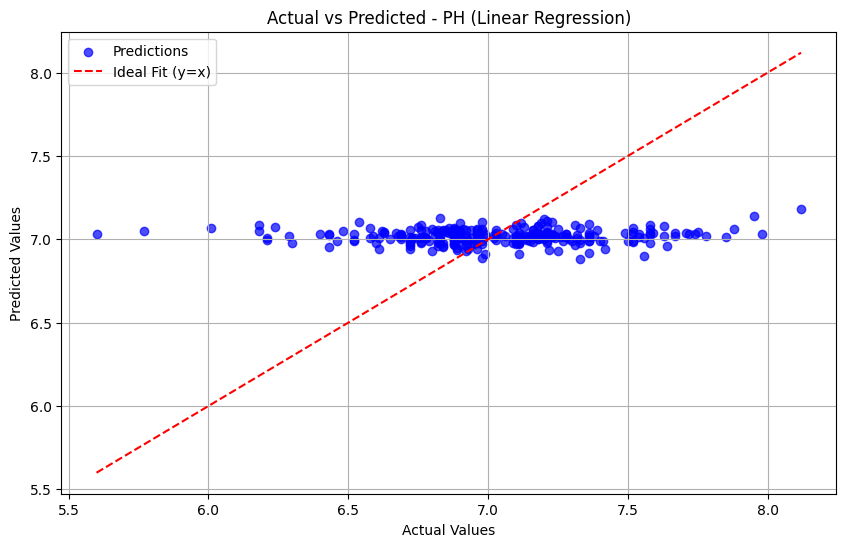

In [ ]:
X_ph_train, X_ph_test, y_ph_train, y_ph_test = train_test_split(X_ph, y_ph, test_size=0.2, random_state=42)


model_ph = LinearRegression()
model_ph.fit(X_ph_train, y_ph_train)


y_ph_pred = model_ph.predict(X_ph_test)


results_PH = pd.DataFrame({
    'Actual': y_ph_test,
    'Predicted': y_ph_pred
})


plt.figure(figsize=(10, 6))
plt.scatter(results_PH['Actual'], results_PH['Predicted'], color='blue', alpha=0.7, label='Predictions')
min_val = min(results_PH['Actual'].min(), results_PH['Predicted'].min())
max_val = max(results_PH['Actual'].max(), results_PH['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit (y=x)')
plt.title('Actual vs Predicted - PH (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()

Turbidity

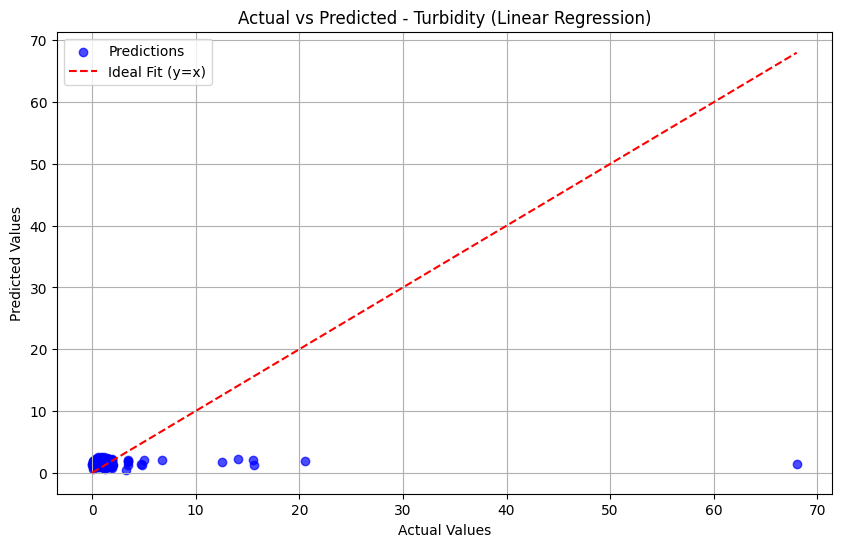

In [ ]:
X_turbidity_train, X_turbidity_test, y_turbidity_train, y_turbidity_test = train_test_split(
    X_turbidity, y_turbidity, test_size=0.2, random_state=42)


model_turbidity = LinearRegression()
model_turbidity.fit(X_turbidity_train, y_turbidity_train)


y_turbidity_pred = model_turbidity.predict(X_turbidity_test)


results_TURBIDITY = pd.DataFrame({
    'Actual': y_turbidity_test,
    'Predicted': y_turbidity_pred
})


plt.figure(figsize=(10, 6))
plt.scatter(results_TURBIDITY['Actual'], results_TURBIDITY['Predicted'], color='blue', alpha=0.7, label='Predictions')
min_val = min(results_TURBIDITY['Actual'].min(), results_TURBIDITY['Predicted'].min())
max_val = max(results_TURBIDITY['Actual'].max(), results_TURBIDITY['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit (y=x)')
plt.title('Actual vs Predicted - Turbidity (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()

Colour

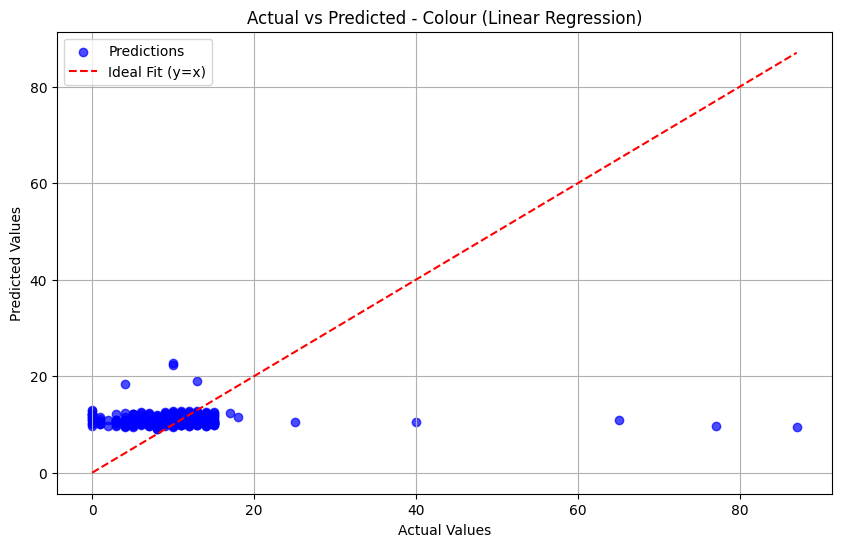

In [ ]:
X_colour_train, X_colour_test, y_colour_train, y_colour_test = train_test_split(
    X_colour, y_colour, test_size=0.2, random_state=42)


model_colour = LinearRegression()
model_colour.fit(X_colour_train, y_colour_train)


y_colour_pred = model_colour.predict(X_colour_test)


results_COLOUR = pd.DataFrame({
    'Actual': y_colour_test,
    'Predicted': y_colour_pred
})

# 5. Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(results_COLOUR['Actual'], results_COLOUR['Predicted'], color='blue', alpha=0.7, label='Predictions')
min_val = min(results_COLOUR['Actual'].min(), results_COLOUR['Predicted'].min())
max_val = max(results_COLOUR['Actual'].max(), results_COLOUR['Predicted'].max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Ideal Fit (y=x)')
plt.title('Actual vs Predicted - Colour (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(y_test, y_pred, target_name):
    r2 = r2_score(y_test, y_pred)
    accuracy = r2 * 100  # Convert R² to percentage
    print(f"\nEvaluation Metrics for {target_name}:")
    print(f"Mean Absolute Error (MAE): {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"Mean Squared Error (MSE): {mean_squared_error(y_test, y_pred):.2f}")
    print(f"R-squared (R²): {r2:.2f}")


evaluate_model(y_turbidity_test, y_turbidity_pred, "Turbidity")

evaluate_model(y_tds_test, y_tds_pred, "TDS")
evaluate_model(y_ph_test, y_ph_pred, "PH")
evaluate_model(y_colour_test, y_colour_pred, "Colour")


Evaluation Metrics for Turbidity:
Mean Absolute Error (MAE): 1.25
Mean Squared Error (MSE): 20.82
R-squared (R²): -0.01

Evaluation Metrics for TDS:
Mean Absolute Error (MAE): 22.08
Mean Squared Error (MSE): 7234.30
R-squared (R²): 0.01

Evaluation Metrics for PH:
Mean Absolute Error (MAE): 0.28
Mean Squared Error (MSE): 0.13
R-squared (R²): 0.00

Evaluation Metrics for Colour:
Mean Absolute Error (MAE): 4.73
Mean Squared Error (MSE): 77.46
R-squared (R²): -0.06
